# Análisis del Engagement en Videos Publicitarios

## Introducción

En este notebook, exploraremos el engagement en videos publicitarios utilizando datos de un mercado de publicidad programática. Llamamos "engagement" a la cantidad de tiempo que es reproducido un anuncio en formato de video antes de ser cerrado por el usuario o de que éste abandone el sitio o aplicación que está mostrando el anuncio. El objetivo de este trabajo es analizar y entender los factores que afectan la duración de la visualización de estos anuncios por parte de los usuarios.

### Publicidad Programática

La publicidad programática es un método automatizado de compra y venta de espacios publicitarios en tiempo real. Utiliza algoritmos y tecnología para comprar impresiones publicitarias en lugar de hacerlo manualmente. Este sistema permite a los anunciantes llegar a audiencias específicas de manera más eficiente y efectiva.

Optimizar el Completion Rate (el porcentaje de videos vistos de principio a fin) y la cantidad de segundos que cada usuario pasa viendo una publicidad es crucial porque afecta directamente el retorno de inversión (ROI) de las campañas publicitarias. Anuncios que capturan la atención del usuario por más tiempo son más propensos a generar conversiones, mejorar la percepción de la marca y, en última instancia, incrementar las ventas.

## Hipótesis

El objetivo del presente análisis es encontrar las variables que nos ayuden a calcular la probabilidad que tiene un usuario de visualizar un anuncio en formato video hasta el final, de forma tal que podamos tomar decisiones de negocio tales como:
 - Filtrar los espacios publicitarios que nos interesa comprar de los que no
 - Calcular el precio a ofertar por un espacio publicitario en un contexto de Real Time Bidding (Subastas en tiempo real) en función de esa probabilidad

## Sección 1: Importación de Librerías

A continuación importaremos las librerías necesarias para el análisis de datos y la visualización y cargaremos el dataset.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Sección 2: Carga de Datos

Cargamos los datos desde un archivo CSV y mostramos las primeras filas del dataset.

In [31]:

url = 'https://raw.githubusercontent.com/garcia-damian/Data-Science-Fundamentals/643f1ee906b2675242c38eceadefff4d492d4cff/dataset-preentrega.csv'
df = pd.read_csv(url, sep=',')
df.head()

,auction_id,ConvertedDateTime,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,placement_language,website_id,referer_deep_three,ua_country,ua_os,ua_browser,ua_browser_version,ua_device,user_average_seconds_played,seconds_played
0,79e1a817-5cdf-4647-b1bc-085eef59fd6f,2018-01-30 00:00,28,198703,215548,2211,44411,es,30467,com/apertura/realstate,ar,iOS,Safari mobile,11.0,Phone,NaN,2
1,7cc34d53-d211-4fd3-ab70-8380f6578f54,2018-01-30 17:34,26,202215,215127,6809,48065,en,32298,pe/rpp/peru,pe,Android,Chrome Mobile,55.0,Phone,NaN,0
2,7df839f1-e279-4640-99ee-48b497c3e952,2018-01-30 02:13,15,198514,215163,3978,43247,en,29786,com/destinationtips/air-travel,us,iOS,Facebook App,NaN,Tablet,NaN,10
3,7f7ce586-e5ea-4320-be44-b3955801451d,2018-01-30 12:28,90,200028,212177,8730,42455,pt,29417,com.br/baixaki/download,br,Windows,Chrome,62.0,PersonalComputer,NaN,37
4,80a2c52d-c26b-4950-9fa8-cad9c489f22b,2018-01-30 15:54,9,197250,208437,4699,44662,de,30587,de/dogforum/index.php,at,iOS,Safari mobile,11.0,Phone,NaN,2


## Sección 3: Análisis Exploratorio de Datos (EDA)

### Descripción de los Datos

A continuación, veremos una descripción general de los datos para entender su estructura y características principales.


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15162 entries, 0 to 15161
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   auction_id                   15162 non-null  object 
 1   ConvertedDateTime            15162 non-null  object 
 2   creative_duration            15162 non-null  int64  
 3   creative_id                  15162 non-null  int64  
 4   campaign_id                  15162 non-null  int64  
 5   advertiser_id                15162 non-null  int64  
 6   placement_id                 15162 non-null  int64  
 7   placement_language           15162 non-null  object 
 8   website_id                   15162 non-null  int64  
 9   referer_deep_three           15158 non-null  object 
 10  ua_country                   15162 non-null  object 
 11  ua_os                        15162 non-null  object 
 12  ua_browser                   15162 non-null  object 
 13  ua_browser_versi

In [33]:
df.describe()

,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,website_id,ua_browser_version,user_average_seconds_played,seconds_played
count,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,11467.000000,4527.000000,15162.000000
mean,26.829706,200048.605857,212183.363013,4849.219298,44206.265532,30309.467880,46.643150,9.694123,5.764345
std,25.646985,3375.980360,4301.311146,2559.167629,1703.945423,916.912823,23.074466,10.215462,8.117862
min,5.000000,158193.000000,166863.000000,1207.000000,39477.000000,24330.000000,2.000000,0.000000,0.000000
25%,14.000000,199027.000000,211465.000000,2295.000000,43247.000000,29786.000000,15.000000,2.000000,0.000000
50%,18.000000,201291.000000,213746.000000,4684.000000,44222.000000,30353.000000,63.000000,7.500000,3.000000
75%,29.000000,201370.000000,214003.000000,7096.000000,44810.000000,30659.000000,63.000000,15.000000,9.000000
max,135.000000,202920.000000,215885.000000,9269.000000,48174.000000,32318.000000,66.000000,91.000000,135.000000


## Sección 4: Preprocesamiento de Datos

Limpiaremos los datos y realizaremos transformaciones necesarias para prepararlos para el análisis.

In [34]:
print(df.isnull().sum())

auction_id                         0
ConvertedDateTime                  0
creative_duration                  0
creative_id                        0
campaign_id                        0
advertiser_id                      0
placement_id                       0
placement_language                 0
website_id                         0
referer_deep_three                 4
ua_country                         0
ua_os                              0
ua_browser                         0
ua_browser_version              3695
ua_device                          3
user_average_seconds_played    10635
seconds_played                     0
dtype: int64



### Eliminación de Valores Nulos

La columna ```user_average_seconds_played``` tiene +70% de valores nulos, por lo que lo mejor es eliminarla. Lo mismo ocurre para la columna ```ua_browser_version```, cuyo porcentaje de valores nulos excede el 24%.

In [35]:
df = df.drop(['user_average_seconds_played', 'ua_browser_version'], axis=1)

Además imputaremos los valores nulos de la columna ```ua_device``` con el valor de su moda

In [36]:
# Calcular la moda de la columna 'ua_device'
moda_ua_device = df['ua_device'].mode()[0]

# Imputar los valores nulos con la moda
df['ua_device'] = df['ua_device'].fillna(moda_ua_device)

### Conversión de Tipos de Datos

Convertimos los tipos de datos de ciertas columnas para facilitar el análisis.

In [37]:
# Conversión de tipos de datos
df['ConvertedDateTime'] = pd.to_datetime(df['ConvertedDateTime'])
df['creative_duration'] = df['creative_duration'].astype(int)
df['seconds_played'] = df['seconds_played'].astype(int)
df['creative_id'] = df['creative_id'].astype('category')
df['campaign_id'] = df['campaign_id'].astype('category')
df['advertiser_id'] = df['advertiser_id'].astype('category')
df['placement_id'] = df['placement_id'].astype('category')
df['website_id'] = df['website_id'].astype('category')
df.describe().round(1)

,ConvertedDateTime,creative_duration,seconds_played
count,15162,15162.0,15162.0
mean,2018-01-30 13:14:16.082311168,26.8,5.8
min,2018-01-30 00:00:00,5.0,0.0
25%,2018-01-30 04:06:00,14.0,0.0
50%,2018-01-30 15:42:00,18.0,3.0
75%,2018-01-30 20:07:00,29.0,9.0
max,2018-01-30 23:59:00,135.0,135.0
std,NaN,25.6,8.1


Vamos a extraer la hora a a una columna aparte, de forma que podamos analizar la estacionalidad a partir de esa variable, ya que es muy importante para la industria.

In [38]:
df['hour'] = df['ConvertedDateTime'].apply(lambda x: pd.to_datetime(x).hour).astype('category')
df = df[['auction_id', 'ConvertedDateTime', 'hour'] + [col for col in df.columns if col not in ['auction_id', 'ConvertedDateTime', 'hour']]]
df.head()


,auction_id,ConvertedDateTime,hour,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,placement_language,website_id,referer_deep_three,ua_country,ua_os,ua_browser,ua_device,seconds_played
0,79e1a817-5cdf-4647-b1bc-085eef59fd6f,2018-01-30 00:00:00,0,28,198703,215548,2211,44411,es,30467,com/apertura/realstate,ar,iOS,Safari mobile,Phone,2
1,7cc34d53-d211-4fd3-ab70-8380f6578f54,2018-01-30 17:34:00,17,26,202215,215127,6809,48065,en,32298,pe/rpp/peru,pe,Android,Chrome Mobile,Phone,0
2,7df839f1-e279-4640-99ee-48b497c3e952,2018-01-30 02:13:00,2,15,198514,215163,3978,43247,en,29786,com/destinationtips/air-travel,us,iOS,Facebook App,Tablet,10
3,7f7ce586-e5ea-4320-be44-b3955801451d,2018-01-30 12:28:00,12,90,200028,212177,8730,42455,pt,29417,com.br/baixaki/download,br,Windows,Chrome,PersonalComputer,37
4,80a2c52d-c26b-4950-9fa8-cad9c489f22b,2018-01-30 15:54:00,15,9,197250,208437,4699,44662,de,30587,de/dogforum/index.php,at,iOS,Safari mobile,Phone,2


Otra variable interesante que podemos calcular es el porcentaje de compleción, ya que este valor suele ser utilizado tanto a la hora de medir la performance de una campaña publicitaria como a la hora de pagar por ella.

In [39]:
df['completion_percentage'] = 100 * df['seconds_played'] / df['creative_duration']

Debemos corroborar la validez de los datos. Para ello, checkeamos que no hayan anuncios con porcentaje de complecion por encima de 100.

In [40]:
df[df.completion_percentage > 100].count()

auction_id               0
ConvertedDateTime        0
hour                     0
creative_duration        0
creative_id              0
campaign_id              0
advertiser_id            0
placement_id             0
placement_language       0
website_id               0
referer_deep_three       0
ua_country               0
ua_os                    0
ua_browser               0
ua_device                0
seconds_played           0
completion_percentage    0
dtype: int64

## Sección 5: Visualización de los datos

### Duración de los creativos

Un aspecto importante a la hora de predecir la probabilidad de compleción de la visualización es la duración del creativo. Mientras más largo es el video, menor la probabilidad de visualizarlo completo. Para realizar una buena comparación debemos velar por que la distribución de la duración de nuestros creativos sea realativamente homogénea y no cuente con demasiados outliers.

Como podemos ver en el siguiente boxplot, no es el caso, por lo que antes de entrenar un modelo con este dataset, seguramente nos convendría eliminar esos outliers.

#### Matplotlib

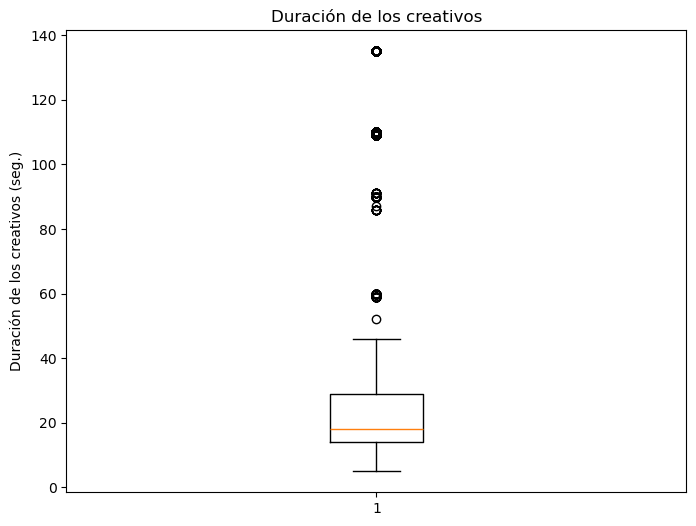

In [41]:
# Establecer el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear el boxplot 
plt.boxplot(df['creative_duration'])

# Establecer el título y etiquetas de los ejes
plt.title('Duración de los creativos')
plt.ylabel('Duración de los creativos (seg.)')
plt.show()


#### Seaborn

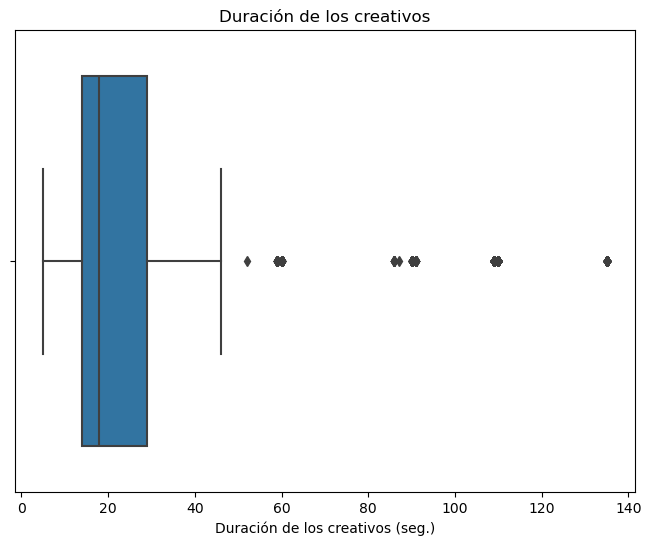

In [42]:
# Establecer el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear el boxplot 
sns.boxplot(x=df['creative_duration'])

# Establecer el título y etiquetas de los ejes
plt.title('Duración de los creativos')
plt.xlabel('Duración de los creativos (seg.)')
plt.show()

### Data cleansing

Con el objetivo de mantener la integridad del análisis y de las visualizaciones, vamos a deshacernos de las impresiones donde la duración del creativo excede los 45 segundos.

In [43]:
df = df[df.creative_duration <= 45]

### Histograma de Engagement

Un primer análisis sobre el dataset puede ser la distribución del engagement. Si bien podríamos discriminar esa distribución en función de casi cualquier variable categórica, en este caso lo haremos por tipo de dispositivo.

Como se puede visualizar en los dos graficos siguientes la mayor parte de los usuarios no llega a los 5 segundos de reproducción, por lo que se hace crítico optimizar esta métrica, ya que es uno de los mayores influenciadores en el revenue de la industria.

#### Matplotlib

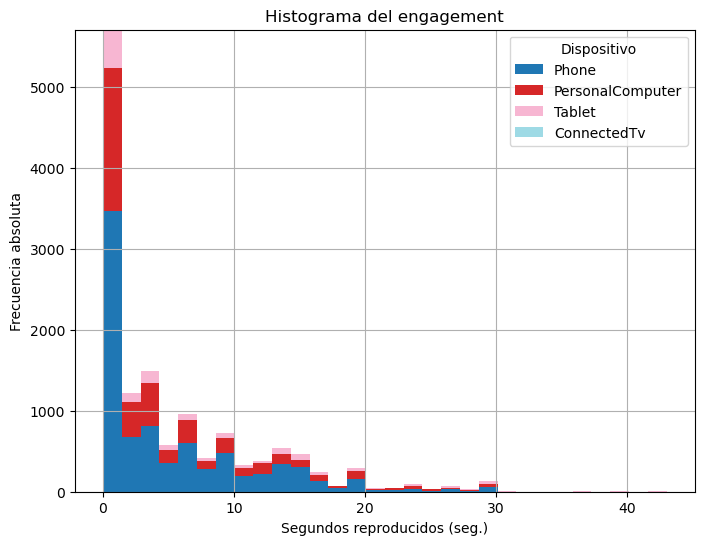

In [44]:
# Calcular el total de ocurrencias para cada dispositivo y revertir el orden para que las más frecuentes aparezcan abajo
device_order = df['ua_device'].value_counts().index

# Definir los intervalos
bins = np.linspace(df['seconds_played'].min(), df['seconds_played'].max(), 31)

# Preparar los datos del histograma para cada dispositivo
hist_data = {device: np.histogram(df[df['ua_device'] == device]['seconds_played'], bins=bins)[0] for device in device_order}

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar las barras apiladas
bottom = np.zeros(len(bins) - 1)
colors = plt.cm.tab20(np.linspace(0, 1, len(device_order)))  # Generar una paleta de colores

for device, color in zip(device_order, colors):
    ax.bar(bins[:-1], hist_data[device], width=np.diff(bins), align='edge', label=device, bottom=bottom, color=color)
    bottom += hist_data[device]

# Título y etiquetas
ax.set_title('Histograma del engagement')
ax.set_xlabel('Segundos reproducidos (seg.)')
ax.set_ylabel('Frecuencia absoluta')
ax.legend(title='Dispositivo')
ax.grid(True)

# Mostrar la gráfica
plt.show()

#### Seaborn

c:\Users\thega\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\thega\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\thega\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\thega\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a

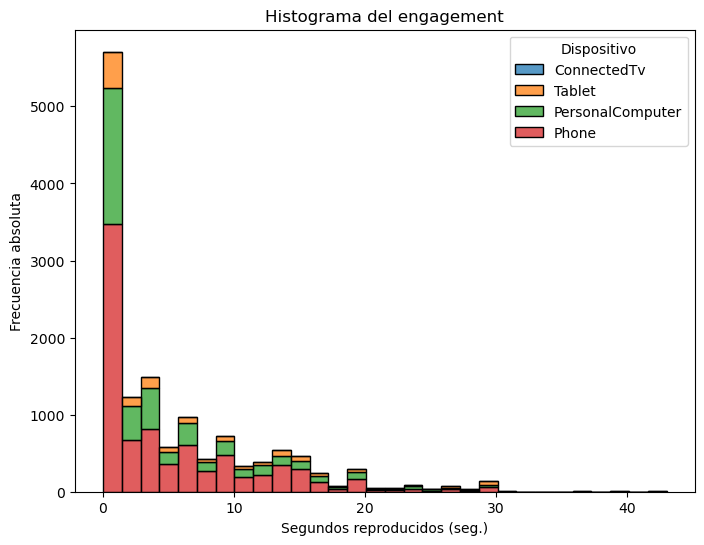

In [45]:
# Calcular el total de ocurrencias para cada dispositivo y revertir el orden
device_order = df['ua_device'].value_counts().index[::-1]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el histograma con el orden de matiz ordenado
sns.histplot(data=df, x='seconds_played', bins=30, ax=ax, hue='ua_device', multiple='stack', hue_order=device_order)

# Establecer el título y las etiquetas
ax.set_title('Histograma del engagement')
ax.set_xlabel('Segundos reproducidos (seg.)')
ax.set_ylabel('Frecuencia absoluta')

# Actualizar el título de la leyenda
leg = ax.get_legend()
leg.set_title('Dispositivo')

# Mostrar la gráfica
plt.show()


### Completion Rate por dispositivo y por sistema operativo

Otro análisis interesante puede ser la distribución del engagement a través de los diferentes dispositivos y sistemas operativos donde se ubican estos espacios publicitarios. Esto se debe a que tanto el dispositivo como el sistema operativo que utiliza el usuario representan una buena heurísitica de las actividades que realiza y, por ende, de cuánto tiempo puede invertir mirando un anuncio.

#### Influencia del dispositivo (Matplotlib):

A continuación utilizaremos Matplotlib para analizar el Completion Rate en función del dispositivo del usuario. Se puede apreciar que los anuncios impresos en tablets tienen mejor engagement que los otros. Además, los anuncios mostrados en TVs son los que menos engagement generan.

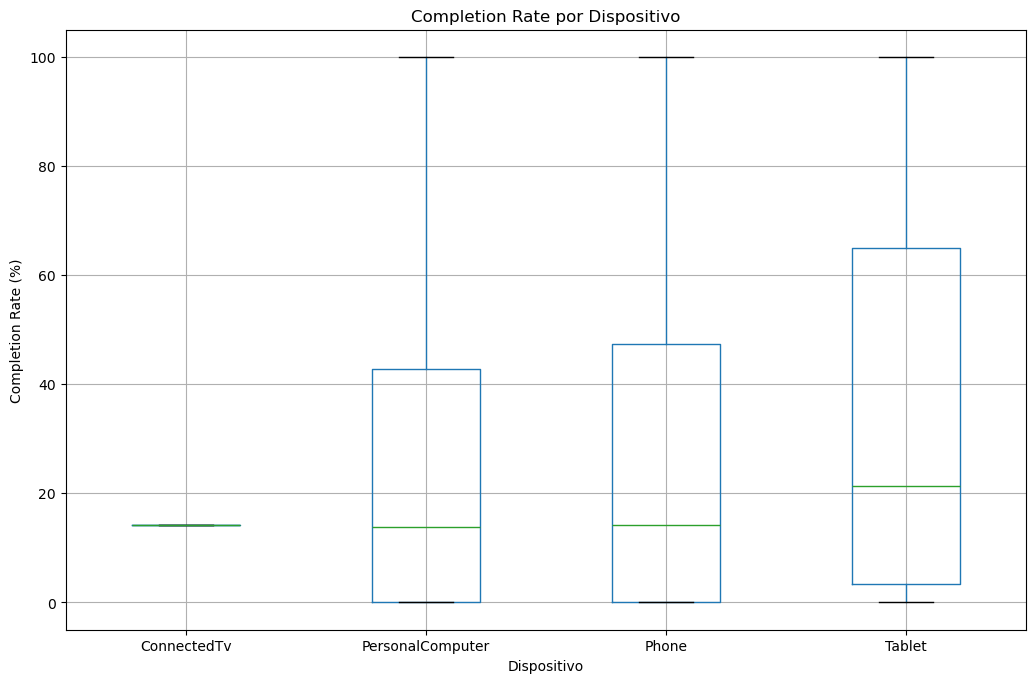

In [46]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Crear el boxplot
df.boxplot(column='completion_percentage', by='ua_device', ax=ax)

# Configurar etiquetas y título
ax.set_title('Completion Rate por Dispositivo')
ax.set_xlabel('Dispositivo')
ax.set_ylabel('Completion Rate (%)')

# Eliminar el título automático generado por `boxplot`
plt.suptitle('')

# Mostrar el gráfico
plt.show()


#### Influencia del sistema operativo (Seaborn):

A continuación haremos un análisis casi igual al anterior sólo que en lugar de analizar el engagement en función del dispositivo, lo haremos en función del sistema operativo y utilizaremos Seaborn, sólo por variar de herramienta. En este gráfico podemos apreciar cómo los sistemas operativos más rentables (en términos publicitarios, claro está) son iOS, Linux, Windows y Android.

Otro dato interesante es que los espacios publicitarios de los cuales desconocemos el SO son los que mejor engagement presentan. Si tuvieramos acceso a la fuente de los datos podríamos investigar de qué sistema operativo están llegando estas impresiones.

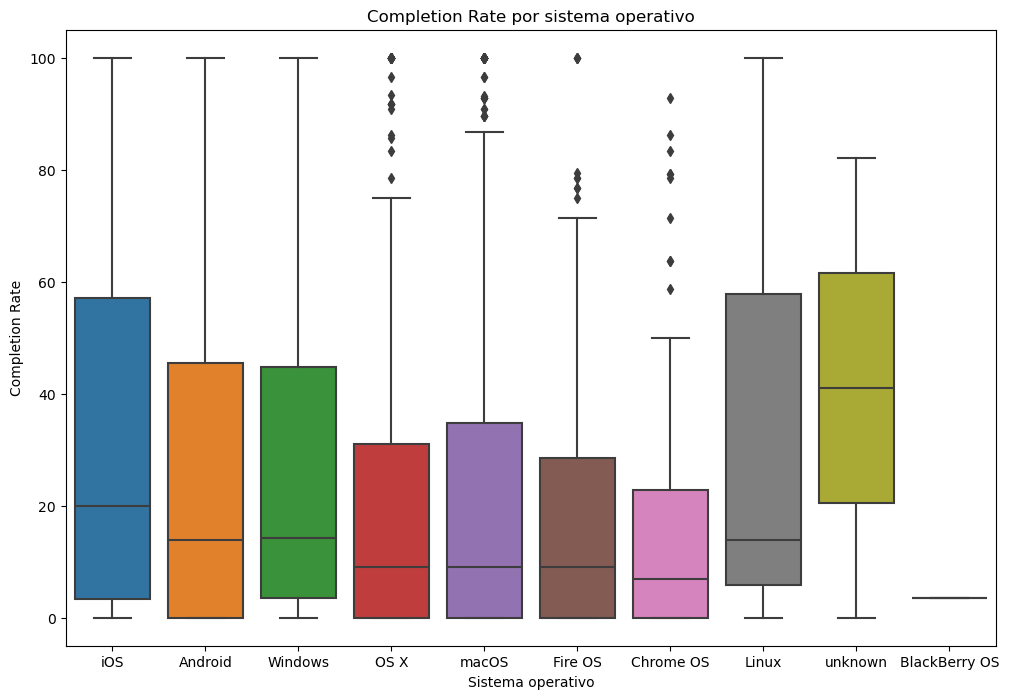

In [19]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Crear el boxplot
sns.boxplot(data=df, x='ua_os', y='completion_percentage', ax=ax)

# Configurar etiquetas y título
ax.set_title('Completion Rate por sistema operativo')
ax.set_xlabel('Sistema operativo')
ax.set_ylabel('Completion Rate (%)')

# Mostrar el gráfico
plt.show()


### Estacionalidad de las impresiones

Las impresiones de anuncios en diferentes aplicaciones o sitios dependen del uso que le dan los usuarios a esas aplicaciones o sitios. Como podemos ver en el siguiente análisis la mayor cantidad de impresiones se genera entre las 17hs y las 3hs de la madrugada. Podemos discriminarlas por tipo de dispositivo para tener una visualización más detallada.

#### Matplotlib

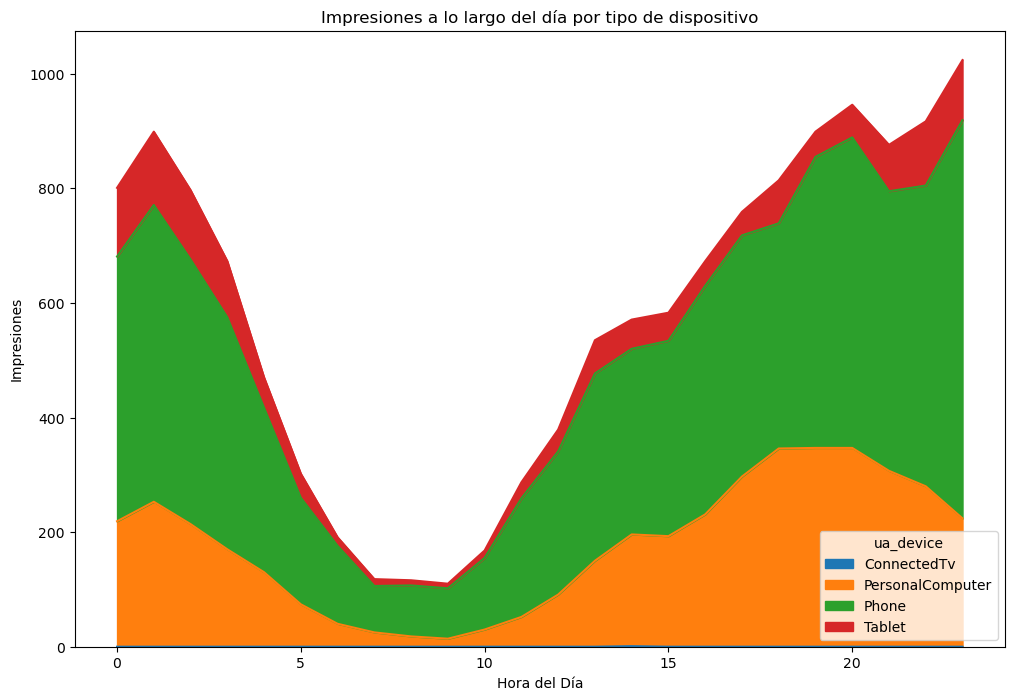

In [47]:
# Agrupar los datos por hora y lenguaje de ubicación
grouped = df.groupby(['hour', 'ua_device'], observed=False)['auction_id'].count().unstack()

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Crear el stacked area chart
grouped.plot(kind='area', stacked=True, ax=ax)

# Configurar etiquetas y título
ax.set_title('Impresiones a lo largo del día por tipo de dispositivo')
ax.set_xlabel('Hora del Día')
ax.set_ylabel('Impresiones')

# Mostrar el gráfico
plt.show()


#### Seaborn

c:\Users\thega\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\thega\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\thega\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\thega\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

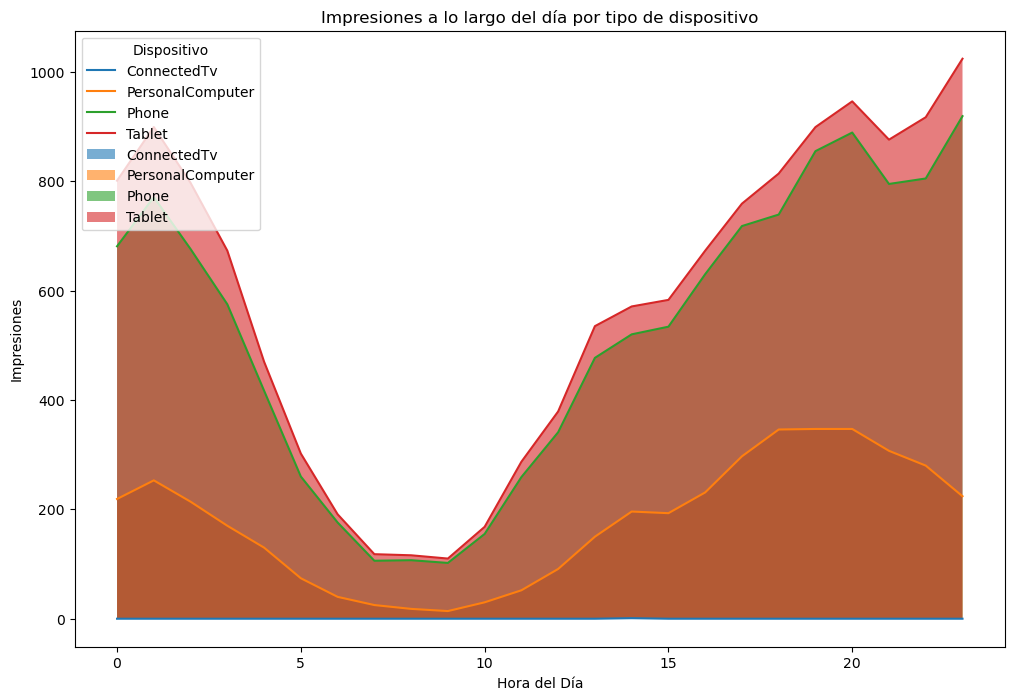

In [48]:
# Agrupar los datos por hora y dispositivo
grouped = df.groupby(['hour', 'ua_device'], observed=False)['auction_id'].count().unstack()

# Crear DataFrame acumulado
grouped_cumsum = grouped.cumsum(axis=1)

# Crear la figura y el eje
plt.figure(figsize=(12, 8))

# Crear el gráfico de curvas apiladas 
for column in grouped.columns:
    sns.lineplot(data=grouped_cumsum, x=grouped.index, y=grouped_cumsum[column], label=column)

# Pintar área bajo cada curva
for i, column in enumerate(grouped.columns):
    plt.fill_between(grouped.index, grouped_cumsum[column], label=column, alpha=0.6)

# Título y Etiquetas
plt.title('Impresiones a lo largo del día por tipo de dispositivo')
plt.xlabel('Hora del Día')
plt.ylabel('Impresiones')
plt.legend(title='Dispositivo', loc='upper left')

# Mostrar el gráfico
plt.show()



### Estacionalidad del engagement

El engagement también tiene su propia estacionalidad a lo largo del día, ya que el tiempo que dedica el usuario a ver un anuncio está influenciado por la actividad que está realizando en ese momento. Como podemos ver en el siguiente análisis, el mayor nivel de engagement lo tenemos entre las 8:00 y las 11:00 de la mañana con un extraño valle a las 9:00. Sería bueno investigar si ese valle es representativo de los datos de la industria o si sólo se debe a una particularidad de los datos muestreados en el dataset.

#### Matplotlib

c:\Users\thega\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\thega\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


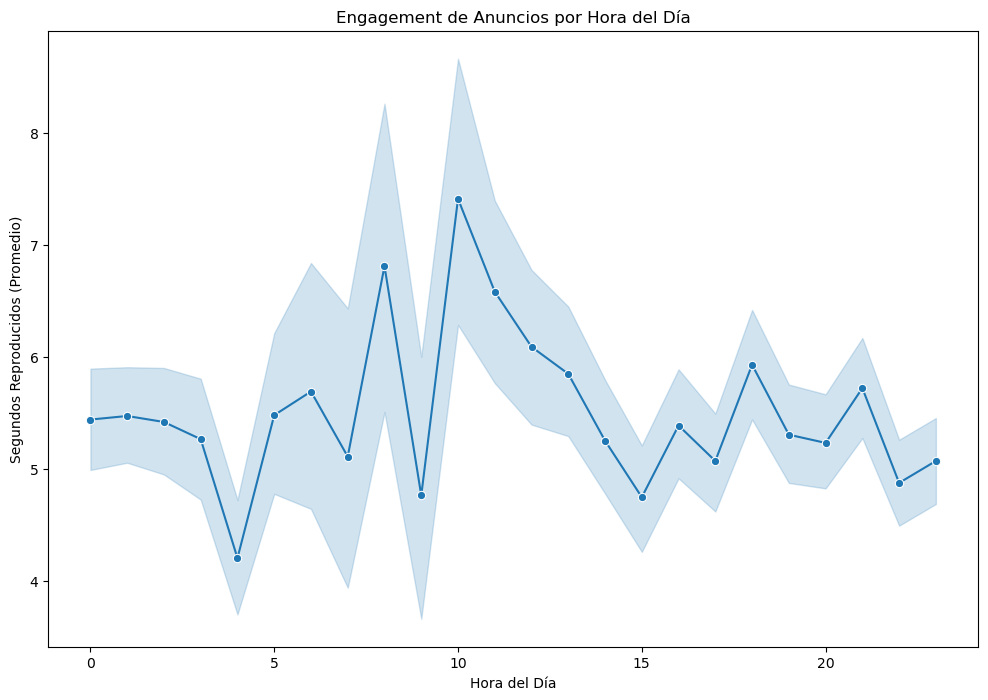

In [50]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Crear el line plot
sns.lineplot(data=df, x='hour', y='seconds_played', ax=ax, marker='o')

# Configurar etiquetas y título
ax.set_title('Engagement de Anuncios por Hora del Día')
ax.set_xlabel('Hora del Día')
ax.set_ylabel('Segundos Reproducidos (Promedio)')

# Mostrar el gráfico
plt.show()


#### Seaborn

C:\Users\thega\AppData\Local\Temp\ipykernel_14460\1183570874.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_engagement = df.groupby('hour')['seconds_played'].mean().reset_index()
c:\Users\thega\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\thega\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


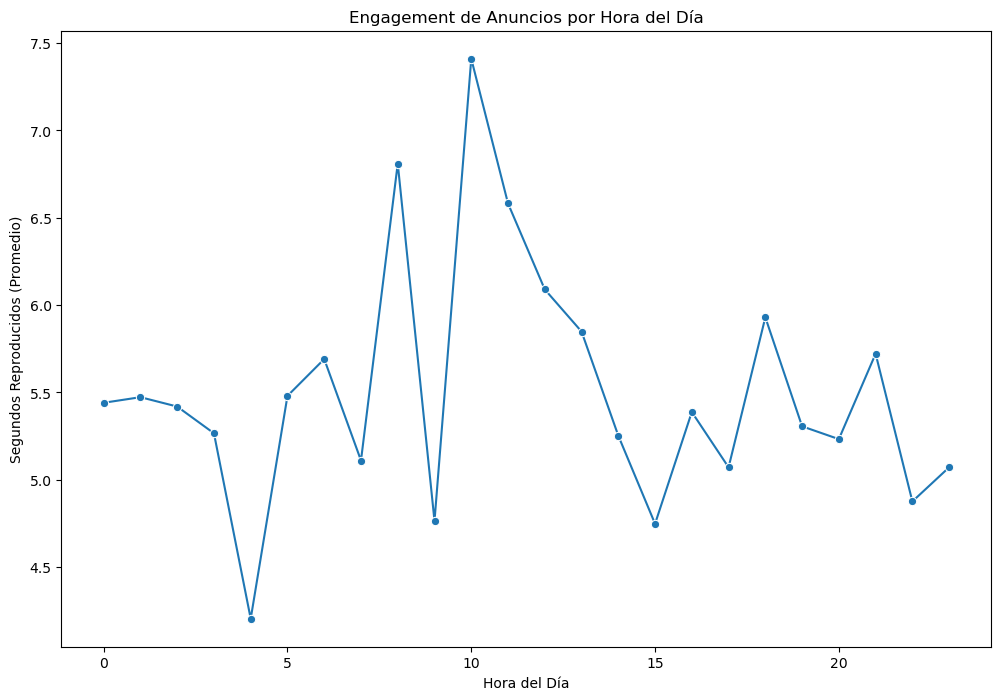

In [51]:
# Agrupar por hora y calcular el promedio de segundos reproducidos
hourly_engagement = df.groupby('hour')['seconds_played'].mean().reset_index()

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Crear el line plot
sns.lineplot(data=hourly_engagement, x='hour', y='seconds_played', ax=ax, marker='o')

# Configurar etiquetas y título
ax.set_title('Engagement de Anuncios por Hora del Día')
ax.set_xlabel('Hora del Día')
ax.set_ylabel('Segundos Reproducidos (Promedio)')

# Mostrar el gráfico
plt.show()

### Porcentaje de compleción en función de la duración del creativo

Como dijimos antes, mientras más largo es un video, se supone que menor es la probabilidad de que lo veamos completo. A continuación hacemos un análisis del porcentaje de compleción en función de la duración del anuncio.

Si bien podemos ver que los videos más largos tienen muy pocas ocurrencias donde el usuario ha visualizado más de la mitad del mismo, para los videos de menor duración (menos de 30 segundos) no se visualizan patrones claros de influencia entre estas dos variables.

In [24]:
# Calcular la frecuencia de ocurrencias para cada par de creative_duration y completion_percentage
frequency_df = df.groupby(['creative_duration', 'completion_percentage']).size().reset_index(name='frequency')

# Normalizar los tamaños para que estén entre 10 y 500
min_size = 10
max_size = 500
sizes = np.interp(frequency_df['frequency'], (frequency_df['frequency'].min(), frequency_df['frequency'].max()), (min_size, max_size))


#### Matplotlib

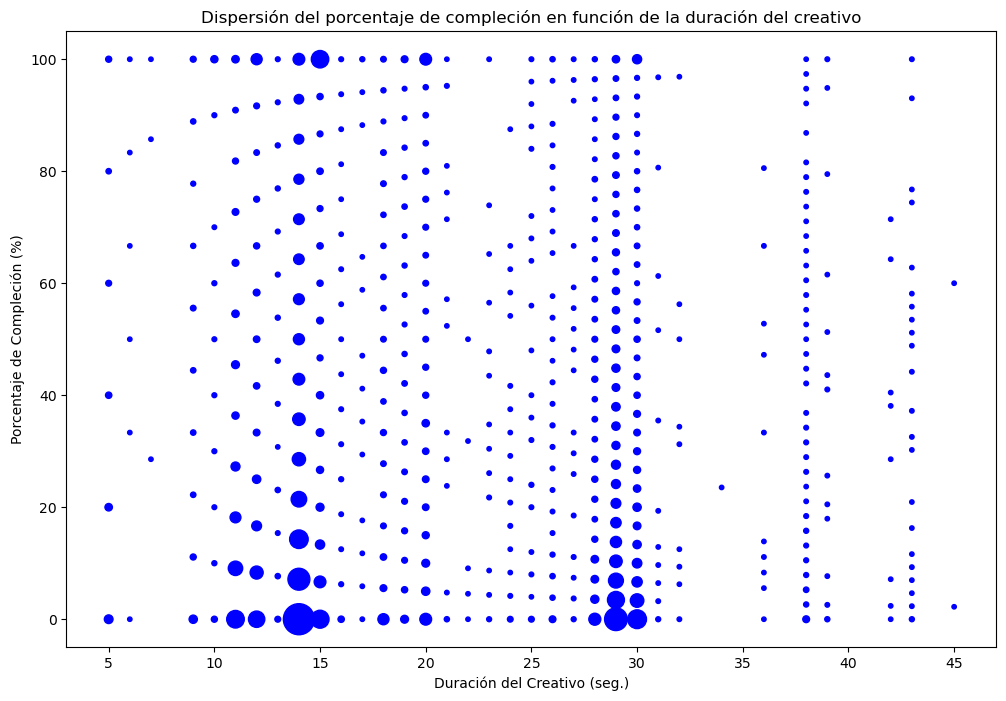

In [52]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Crear el scatterplot
scatter = ax.scatter(
    frequency_df['creative_duration'], 
    frequency_df['completion_percentage'], 
    s=sizes, 
    color='blue'  
)

# Titulo y etiquetas 
ax.set_title('Dispersión del porcentaje de compleción en función de la duración del creativo')
ax.set_xlabel('Duración del Creativo (seg.)')
ax.set_ylabel('Porcentaje de Compleción (%)')

# Mostrar el gráfico
plt.show()

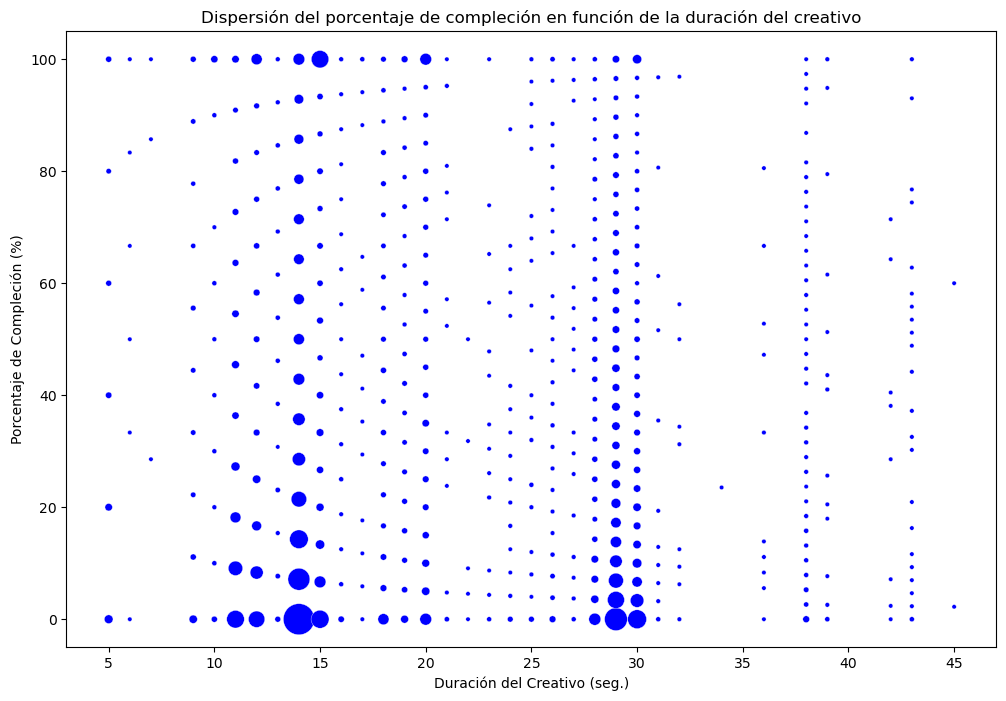

In [53]:
frequency_df['sizes'] = sizes

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Crear el scatterplot con Seaborn
sns.scatterplot(
    data=frequency_df, 
    x='creative_duration', 
    y='completion_percentage', 
    size='sizes', 
    legend=False, 
    sizes=(min_size, max_size),
    color='blue'  # Establecer un solo color para todos los puntos
)

# Establecer etiquetas y título
ax.set_title('Dispersión del porcentaje de compleción en función de la duración del creativo')
ax.set_xlabel('Duración del Creativo (seg.)')
ax.set_ylabel('Porcentaje de Compleción (%)')

# Mostrar el gráfico
plt.show()

## Conclusiones

A partir de la investigación de la industria de la publicidad programática podemos deducir la importancia de la optimización de la métrica correspondiente al engagement para maximizar la rentabilidad de las campañas publicitarias.

Ante las particularidades del dataset, nos vemos en la necesidad de eliminar columnas con demasiados valores nulos y de imputar algunos valores en columnas con algunos valores nulos pero relativamente pocos.

Dado el formato del archivo del dataset, también nos vemos en la necesidad de convertir los datos a tipos que nos permitan manipularlos con mayor facilidad.

Algunas dimensiones del dataset presentan ciertos outliers que deforman el análisis y es necesario eliminarlos en pos de preservar la significancia estadística de los datos.

De la visualización de los datos podemos sacar algunas conclusiones, como por ejemplo que la mayoría de los usuarios no llega a ver los primeros 5 segundos del anuncio antes de cerrarlo y, dado que el Completion Rate es una métrica clave no sólo para medir la performance de las campañas publicitarias sino también para cobrar por ellas, es que su optimización es de suma relevancia.

Otra conclusión temprana que podemos inferir a partir de una primera visualización de los datos es la influencia que tienen tanto el dispositivo como el sistema operativo a la hora de hacer una segmentación cuasi demográfica de los usuarios, entendiendo que representan una buena heurística del engagement que muestran ante los anuncios impresos.

Por otra parte, algunas visualizaciones muestran la clara estacionalidad que maneja la industria a lo largo del día en relación no sólo a la cantidad de impresiones sino también del engagement de las mismas.

Para finalizar, se destaca la clara influencia de la duración de los creativos en el porcentaje de compleción que presentan los mismos, sobre todo en creativos de más de 30 segundos. Extrañamente, esa influencia no se visualiza en creativos más cortos, algo que en lo que se puede seguir indagando en un análisis futuro.

